In [59]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import poisson

In [27]:
def kl(p, q):
    result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
    return result

In [22]:
x = np.arange(-10, 10, 0.001)
len(x)

20000

In [23]:
norm.pdf(x, 0, 2)

array([7.43359757e-07, 7.45220389e-07, 7.47085490e-07, ...,
       7.48955072e-07, 7.47085490e-07, 7.45220389e-07])

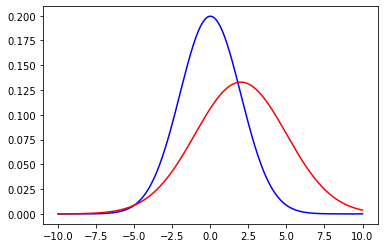

In [24]:
p = norm.pdf(x, 0 , 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c="blue")
plt.plot(x, q, c="red")

In [28]:
kl(p, q)

349.91348337868124

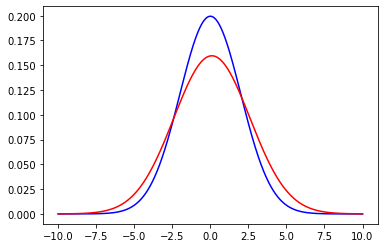

In [29]:
p = norm.pdf(x, 0 , 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c="blue")
plt.plot(x, q, c="red")

In [30]:
kl(p, q)

43.94620233653506

In [32]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [36]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<AxesSubplot:>

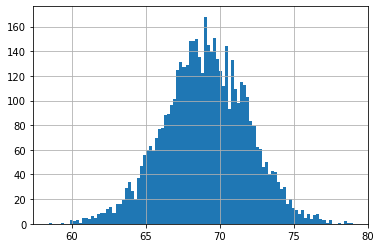

In [39]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=100)

In [42]:
males.describe()['mean']

69.02634590621737

In [43]:
males.describe()['std']

2.8633622286606517

In [47]:
count, division = np.histogram(males, bins=100)
print(count)
print(division)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [48]:
ideal = norm.rvs(size=len(males), loc=males.describe()['mean'], scale=males.describe()['std'])
print(ideal)

[72.19830293 70.14005344 71.15496743 ... 70.60794835 69.56156033
 74.68035232]


In [49]:
icount, idivision = np.histogram(ideal, bins=100)
print(icount)
print(idivision)

[  1   1   0   2   1   0   1   1   3   2   2   1   5  12   5   7   9   7
   9   9  15  10  19  21  22  29  35  34  49  55  32  53  55  68  65  61
  99  94  72  82 100 113  91 112 138 111 119 148 127 137 141 127 124 135
 138 140 130 126 118 106 115 109 117  96  79  80  88  80  78  70  72  63
  50  53  49  36  26  33  30  18  13  20  17  15   7  11   7   7   4   5
   1   3   1   6   5   2   0   1   0   4]
[58.9601743  59.15410093 59.34802757 59.5419542  59.73588084 59.92980748
 60.12373411 60.31766075 60.51158738 60.70551402 60.89944065 61.09336729
 61.28729393 61.48122056 61.6751472  61.86907383 62.06300047 62.2569271
 62.45085374 62.64478037 62.83870701 63.03263365 63.22656028 63.42048692
 63.61441355 63.80834019 64.00226682 64.19619346 64.3901201  64.58404673
 64.77797337 64.9719     65.16582664 65.35975327 65.55367991 65.74760654
 65.94153318 66.13545982 66.32938645 66.52331309 66.71723972 66.91116636
 67.10509299 67.29901963 67.49294626 67.6868729  67.88079954 68.07472617
 68.268652

(array([  1.,   1.,   0.,   2.,   1.,   0.,   1.,   1.,   3.,   2.,   2.,
          1.,   5.,  12.,   5.,   7.,   9.,   7.,   9.,   9.,  15.,  10.,
         19.,  21.,  22.,  29.,  35.,  34.,  49.,  55.,  32.,  53.,  55.,
         68.,  65.,  61.,  99.,  94.,  72.,  82., 100., 113.,  91., 112.,
        138., 111., 119., 148., 127., 137., 141., 127., 124., 135., 138.,
        140., 130., 126., 118., 106., 115., 109., 117.,  96.,  79.,  80.,
         88.,  80.,  78.,  70.,  72.,  63.,  50.,  53.,  49.,  36.,  26.,
         33.,  30.,  18.,  13.,  20.,  17.,  15.,   7.,  11.,   7.,   7.,
          4.,   5.,   1.,   3.,   1.,   6.,   5.,   2.,   0.,   1.,   0.,
          4.]),
 array([58.9601743 , 59.15410093, 59.34802757, 59.5419542 , 59.73588084,
        59.92980748, 60.12373411, 60.31766075, 60.51158738, 60.70551402,
        60.89944065, 61.09336729, 61.28729393, 61.48122056, 61.6751472 ,
        61.86907383, 62.06300047, 62.2569271 , 62.45085374, 62.64478037,
        62.83870701, 63.03

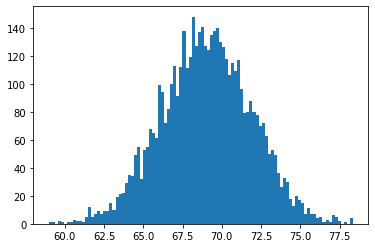

In [51]:
plt.hist(ideal, bins=100)

In [52]:
kl(count, icount)

<ipython-input-27-deecd068b315>:2: RuntimeWarning: divide by zero encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: invalid value encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))


126.55650574146398

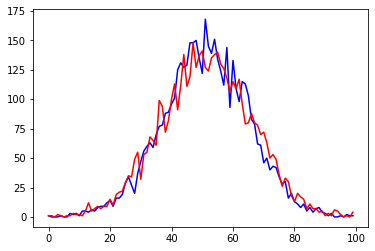

In [53]:
plt.plot(count, c="blue")
plt.plot(icount, c="red")

In [54]:
kl(count, icount)

<ipython-input-27-deecd068b315>:2: RuntimeWarning: divide by zero encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: invalid value encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))


126.55650574146398

In [55]:
count = count / 5000

In [56]:
icount = icount / 5000

In [57]:
kl(count, icount)

<ipython-input-27-deecd068b315>:2: RuntimeWarning: divide by zero encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: invalid value encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))


0.025311301148292786

In [60]:
idealp = poisson.rvs(males.describe()['mean'], size=len(males))

In [61]:
ipcount, ipdivision = np.histogram(idealp, bins=100)

In [62]:
ipcount = ipcount / 5000

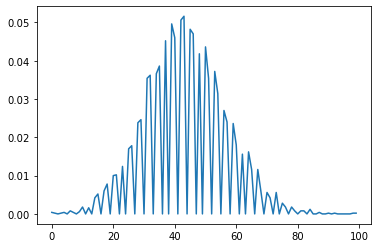

In [63]:
plt.plot(ipcount)

In [66]:
kl(ipcount, count)

<ipython-input-27-deecd068b315>:2: RuntimeWarning: divide by zero encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: invalid value encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))
<ipython-input-27-deecd068b315>:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q !=0), p * np.log(p / q), 0))


0.6294182035922834